# Análise de dados - Starbucks 
by: Alexandre Rodrigues

Starbucks é uma empresa multinacional norte-americana e tem uma das maiores redes de café do mundo. A sede da empresa fica em Seatle, no estado de Washington.

# Análise exploratória de dados (AED)

`1. Data Source:` Destinada ao carregamento dos dados e carregamento das bibliotecas que serão utilizadas.

`2. Data Cleaning:` Aqui será realizado o tratamento dos dados, verificação de outlier, dados nulos, corrigindo formatos, etc.

`3. Análise: ` Análise dos dados demográficos com intuito de entender o perfil de quem solicita o financiamento estudantil(FIES).


# 1. Data Source

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
starbucks = pd.read_csv('starbucks_drinkMenu_expanded.csv')
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
starbucks.tail()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [6]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

O dataset possui um tamanho de 34.2KB, além de possuir três tipos de dados que são object, int64 e float64

In [7]:
starbucks.shape

(242, 18)

In [8]:
starbucks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [9]:
starbucks.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

Podemos observar que nosso conjunto de dados tem 18 colunas e 242 linhas. Além disso, não temos a presença de grandes quantidades de missing values, na verdade, temos somente um NaN presente na coluna de Caffeine (mg).

In [10]:
starbucks.nunique()

Beverage_category             9
Beverage                     33
Beverage_prep                13
Calories                     48
 Total Fat (g)               24
Trans Fat (g)                18
Saturated Fat (g)             4
 Sodium (mg)                  9
 Total Carbohydrates (g)     51
Cholesterol (mg)             75
 Dietary Fibre (g)            8
 Sugars (g)                  70
 Protein (g)                 26
Vitamin A (% DV)             11
Vitamin C (% DV)             10
 Calcium (% DV)              14
Iron (% DV)                  18
Caffeine (mg)                36
dtype: int64

# 2. Data Cleaning

In [11]:
starbucks.dropna(inplace=True)
starbucks.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

Como os dados estão todos no formato necessário para as próximas análises, o único tratamento dos dados necessário foi deletar os dados nulos.

In [12]:
colunas = ['Vitamin A (% DV) ','Vitamin C (% DV)',' Calcium (% DV) ','Iron (% DV) ','Caffeine (mg)']
starbucks[colunas] = starbucks[colunas].applymap(lambda x: str(x).replace('%',''))

In [13]:
starbucks = starbucks.loc[~starbucks['Caffeine (mg)'].isin(['Varies', 'varies'])]

In [14]:
starbucks = starbucks.astype({
    'Vitamin A (% DV) ': 'float',
    'Vitamin C (% DV)': 'float',
    ' Calcium (% DV) ': 'float',
    'Iron (% DV) ': 'float',
    'Caffeine (mg)': 'float'
})


In [15]:
starbucks.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)             float64
Vitamin C (% DV)             float64
 Calcium (% DV)              float64
Iron (% DV)                  float64
Caffeine (mg)                float64
dtype: object

# 3. Análise

Qual categoria de bebidas é mais procurada?

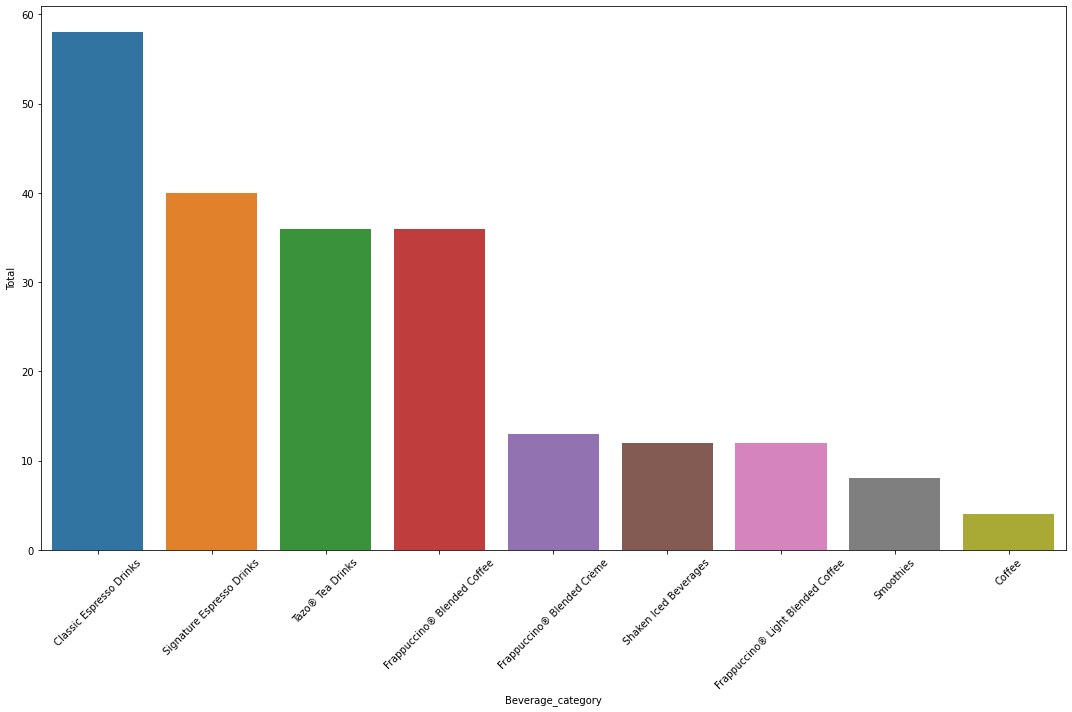

In [16]:
plt.figure(figsize=(15,10))
cat_bebidas = starbucks['Beverage_category'].value_counts().reset_index()
cat_bebidas.columns = ['Beverage_category', 'Total']
sns.barplot(data=cat_bebidas, x='Beverage_category', y='Total')
plt.xticks(rotation=45);

plt.tight_layout()


Notamos que a categoria Classic Espresso Drinks tem uma maior procura por parte dos clientes do Starbucks.

### Quais bebidas da categoria Classic Espresso Drinks é mais consumida?

In [17]:
classic = starbucks.loc[starbucks['Beverage_category'] == 'Classic Espresso Drinks']
classic['Beverage'].nunique()


7

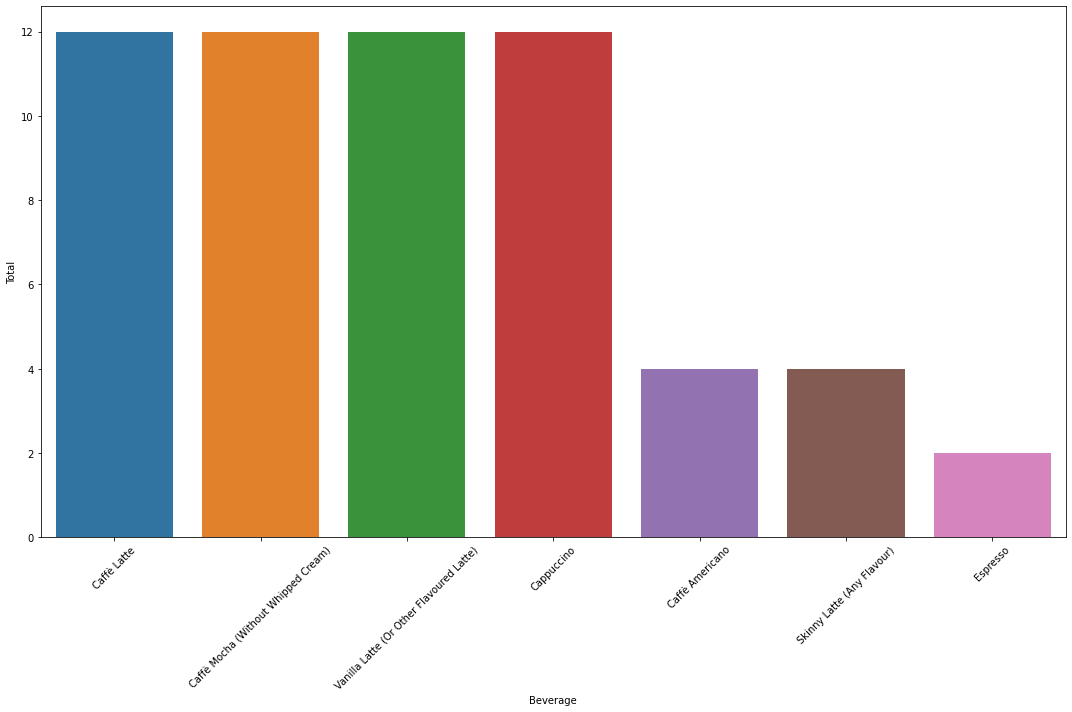

In [18]:
plt.figure(figsize=(15,10))
bebidas = classic['Beverage'].value_counts().reset_index()
bebidas.columns = ['Beverage', 'Total']
sns.barplot(data=bebidas, x='Beverage', y='Total')
plt.xticks(rotation=45);

plt.tight_layout()

As bebidas Caffé Latte, Caffé Mocha(Without Whipped Cream) e Vanilla Latte (Or Other Flavoured Latte).

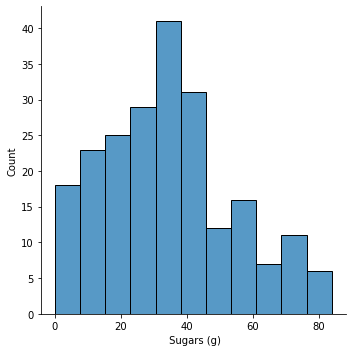

In [19]:
sns.displot(starbucks, x=' Sugars (g)', kind='hist')


A distribuição do açucar nas bebidas do starbucks tende a ter uma assimetria positiva, mas podemos notar que apesar da mediana ser menor que a média elas são bem próximas.

<AxesSubplot:ylabel='Calories'>

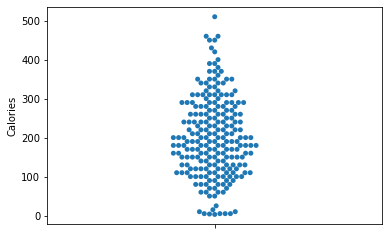

In [20]:
sns.swarmplot(y=starbucks['Calories'])


A distribuição das calorias das bebidas do starbucks tme maior concentração em 100 e 200.

In [21]:
best_drinks = classic.loc[classic['Beverage'].isin(['Caffè Latte','Caffè Mocha (Without Whipped Cream)','Vanilla Latte (Or Other Flavoured Latte)'])]
best_drinks.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6.0,0.0,20.0,8.0,75.0


Das bebidas que mais são vendidas da categoria Classic Espresso Drinks, qual a distribuição de calorias?

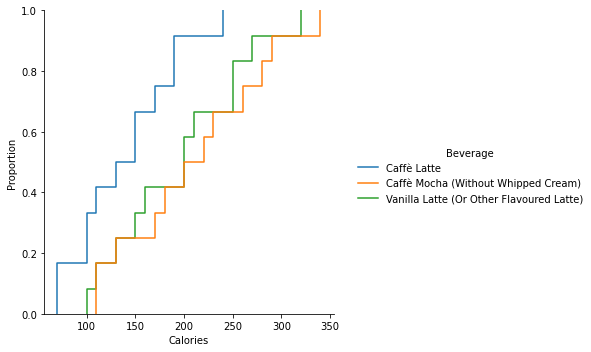

In [22]:
sns.displot(best_drinks, x='Calories', hue='Beverage', kind='ecdf')

<AxesSubplot:xlabel='Calories', ylabel=' Sugars (g)'>

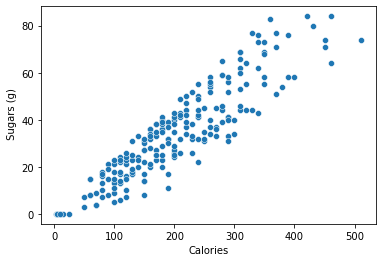

In [23]:
sns.scatterplot(x=starbucks['Calories'], y=starbucks[' Sugars (g)'])

<AxesSubplot:xlabel='Calories', ylabel=' Sugars (g)'>

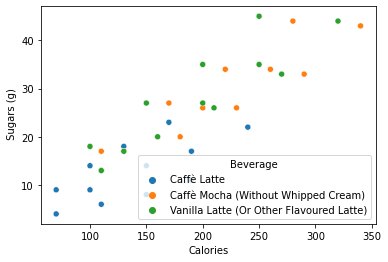

In [24]:
sns.scatterplot(x=best_drinks['Calories'], y=best_drinks[' Sugars (g)'], hue=best_drinks['Beverage'])

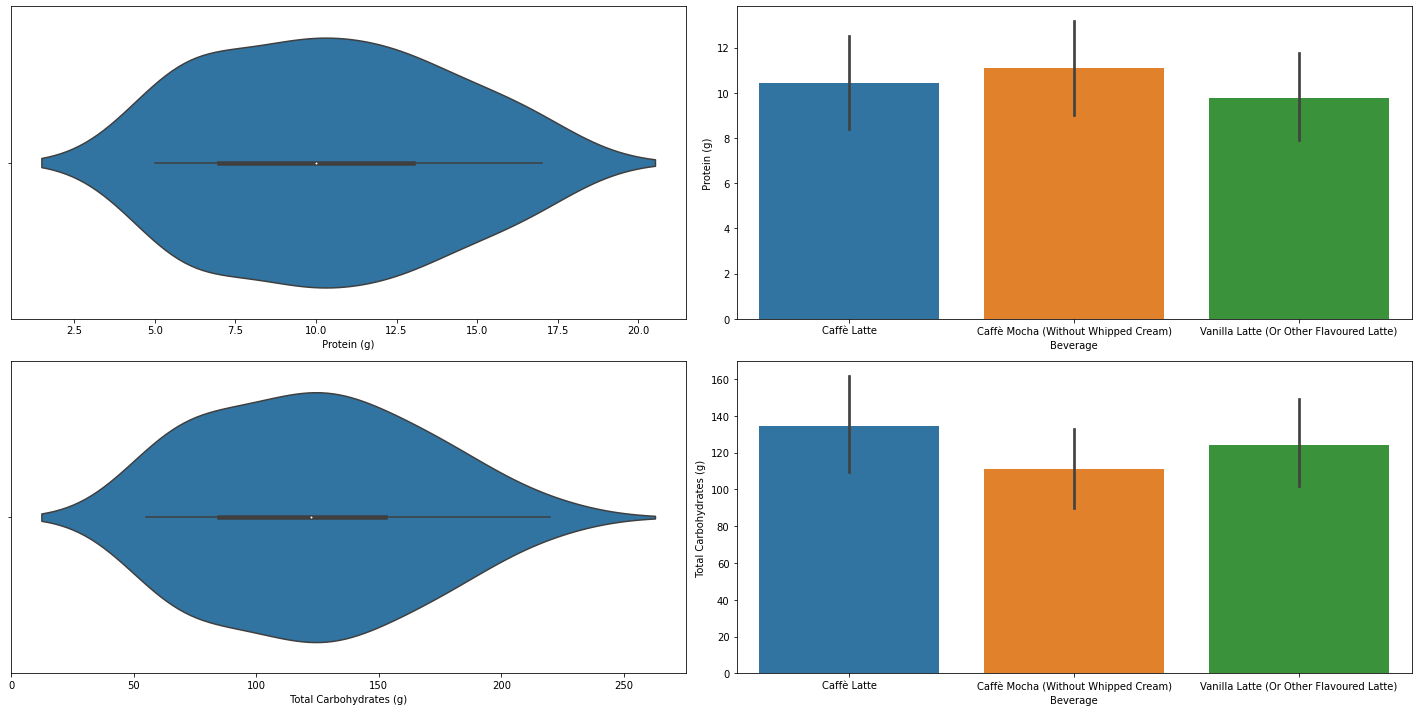

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
sns.violinplot(ax=axes[0][0],x=best_drinks[' Protein (g) '])
sns.barplot(ax=axes[0][1],data=best_drinks.groupby('Beverage')[' Protein (g) '].sum().to_frame(), x=best_drinks['Beverage'], y=best_drinks[' Protein (g) '])
sns.violinplot(ax=axes[1][0],x=best_drinks[' Total Carbohydrates (g) '])
sns.barplot(ax=axes[1][1],data=best_drinks.groupby('Beverage')[' Total Carbohydrates (g) '].sum().to_frame(), x=best_drinks['Beverage'], y=best_drinks[' Total Carbohydrates (g) '])

plt.tight_layout()

In [28]:
best_drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

<AxesSubplot:>

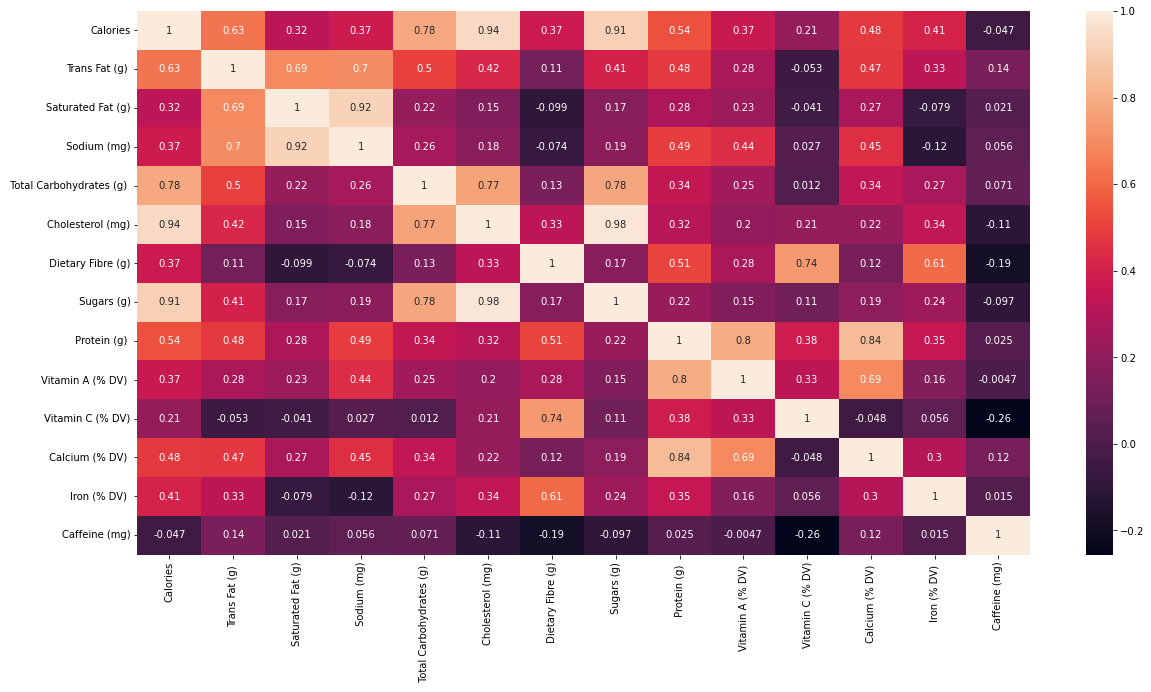

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(starbucks.corr(), annot=True)

Podemos notar algumas relações fortemente positivas como Sugars (g) e Cholesterol (mg).